# 第二部分：积分学 —— 汇聚变化的“累加器”
## Part 2: Integration - The "Accumulator" of Change

## 2.1 定积分: 从“切片累加”到总量
### 2.1 Definite Integral: From "Slicing and Summing" to the Total Amount

### 例子1：如何计算不规则水流的总流量？
#### Example 1: How to Calculate the Total Flow of an Irregular Water Stream?

**生活场景 (Real-world Scenario):**
水龙头的水流速度 `v(t)` 不稳定，时快时慢。我们如何精确计算从 `t=0` 到 `t=10` 分钟，总共流出了多少水？
The flow rate of a faucet, `v(t)`, is unstable, sometimes fast and sometimes slow. How can we accurately calculate the total amount of water that has flowed out from `t=0` to `t=10` minutes?

### 探索步骤 1：可视化与问题
#### Exploration Step 1: Visualization and Problem

**问题 (The Question):**
如果流速是恒定的，总流量就是 `速度 × 时间`。但现在速度在变，怎么办？
If the flow rate were constant, the total volume would simply be `rate × time`. But what do we do when the rate is changing?

**可视化 (Visualization):**
假设流速函数为 (Let's assume the velocity function is) $$v(t) = 0.5t + 2$$ 
我们用 `matplotlib` 画出这条速度-时间曲线。直觉告诉我们，总流量应该就是这条曲线下方的**面积 (area)**。
Let's plot this velocity-time curve using `matplotlib`. Intuitively, the total volume should be the **area** under this curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import integrate
from ipywidgets import interact, IntSlider
from matplotlib.patches import Polygon

# 解决负号显示问题 (Fix for displaying the minus sign)
plt.rcParams['axes.unicode_minus'] = False 

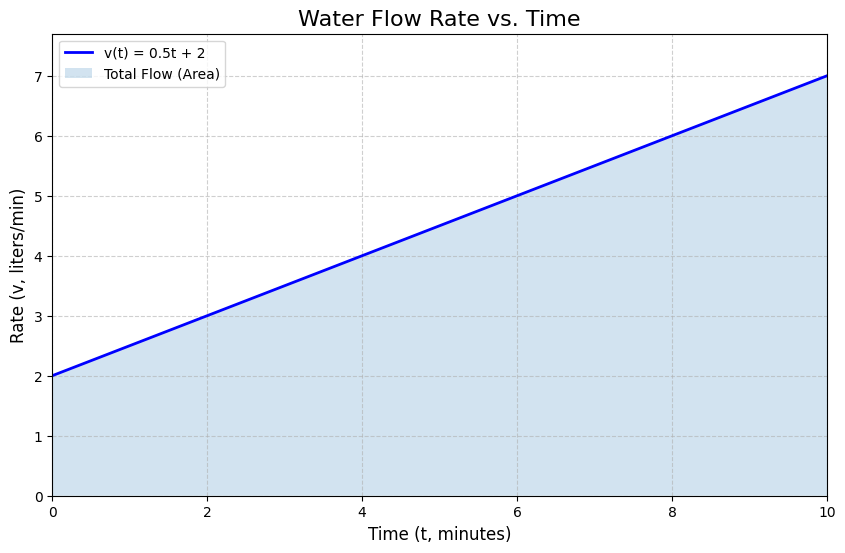

In [2]:
# 定义流速函数 (Define the velocity function)
def velocity_func(t):
    return 0.5 * t + 2

# 生成数据用于绘图 (Generate data for plotting)
t_values = np.linspace(0, 10, 400)
v_values = velocity_func(t_values)

# 创建图形和坐标轴 (Create figure and axes)
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制函数曲线 (Plot the function curve)
ax.plot(t_values, v_values, 'b-', linewidth=2, label='v(t) = 0.5t + 2')

# 填充曲线下方的面积 (Fill the area under the curve)
ax.fill_between(t_values, v_values, alpha=0.2, label='Total Flow (Area)')

# 设置图表属性 (Set chart properties)
ax.set_title('Water Flow Rate vs. Time', fontsize=16)
ax.set_xlabel('Time (t, minutes)', fontsize=12)
ax.set_ylabel('Rate (v, liters/min)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, max(v_values) * 1.1)

# 显示图表 (Show the plot)
plt.show()

# 清理图形，防止重复显示 (Clean up the plot to prevent re-display)
plt.close(fig)

### 探索步骤 2：动手实验：用“笨办法”逼近面积 (数值为基)
#### Exploration Step 2: Hands-on Experiment: Approximating the Area with the "Brute-force" Method (Numerical Basis)

**任务 (Task):**
用我们最熟悉的形状——**矩形 (rectangles)**，来近似这个不规则的面积。我们将时间轴 `[0, 10]` 切成 `N` 个小段，每段都是一个窄窄的矩形。所有这些小矩形的面积之和，就是对总面积的一个近似。这个方法被称为**黎曼和 (Riemann Sum)**。
Let's use the shape we know best—**rectangles**—to approximate this irregular area. We'll slice the time interval `[0, 10]` into `N` small segments, each forming a narrow rectangle. The sum of the areas of these rectangles gives us an approximation of the total area. This method is known as a **Riemann Sum**.

**交互探索 (Interactive Exploration):**
拖动下面的滑块，改变矩形切片的数量 `N`。观察当 `N` 越来越大时，矩形总面积如何逼近真实面积。
Drag the slider below to change the number of rectangular slices, `N`. Observe how the total area of the rectangles approaches the true area as `N` gets larger.

In [3]:
def plot_riemann_sum(N=5):
    """
    一个根据切片数N绘制黎曼和的函数。
    A function to plot the Riemann sum based on the number of slices N.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 绘制原始函数曲线 (Plot the original function curve)
    t_fine = np.linspace(0, 10, 400)
    v_fine = velocity_func(t_fine)
    ax.plot(t_fine, v_fine, 'b-', linewidth=2, label='v(t) = 0.5t + 2')

    # 计算并绘制矩形 (Calculate and plot the rectangles)
    delta_t = 10 / N
    t_rect = np.linspace(0, 10 - delta_t, N)
    v_rect = velocity_func(t_rect)
    ax.bar(t_rect, v_rect, width=delta_t, align='edge', alpha=0.5, edgecolor='black', label=f'{N} Rectangles')

    # 计算黎曼和 (Calculate the Riemann Sum)
    riemann_sum_area = np.sum(v_rect * delta_t)

    # 设置图表属性 (Set chart properties)
    ax.set_title(f'Riemann Sum Approximation (N={N})', fontsize=16)
    ax.set_xlabel('Time (t, minutes)', fontsize=12)
    ax.set_ylabel('Rate (v, liters/min)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    
    # 显示计算出的面积 (Display the calculated area)
    ax.text(0.5, 7.5, f'Approx. Total Flow: {riemann_sum_area:.2f} liters',
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()
    plt.close(fig)

# 使用ipywidgets创建交互式滑块
# Create an interactive slider using ipywidgets
interact(plot_riemann_sum, N=IntSlider(min=1, max=500, step=1, value=5, description='切片数量 (N) / Number of Slices (N)'));

interactive(children=(IntSlider(value=5, description='切片数量 (N) / Number of Slices (N)', max=500, min=1), Outpu…

### 探索步骤 3：抽象出定义
#### Exploration Step 3: Abstracting the Definition

**顿悟 (The "Aha!" Moment):**
我们刚刚通过实验发现，当矩形切片的数量 `N` 趋向于无穷多（即每个矩形的宽度 `Δt` 趋向于0）时，这些矩形面积之和（黎曼和）会收敛到一个精确的值。这个**极限 (limit)** 就是我们要求的总流量。
We've just discovered through experimentation that as the number of rectangular slices `N` approaches infinity (meaning the width of each rectangle `Δt` approaches 0), the sum of their areas (the Riemann Sum) converges to a precise value. This **limit** is the exact total flow we are looking for.

**数学定义 (Mathematical Definition):**
这就是**定积分 (Definite Integral)** 的定义！它精确地表示了函数曲线在某个区间内与坐标轴围成的（有向）面积。
This is the definition of the **Definite Integral**! It precisely represents the (signed) area enclosed by a function's curve and the coordinate axis over a given interval.

$$\text{总流量} = \int_{0}^{10} v(t) dt = \lim_{N \to \infty} \sum_{i=1}^{N} v(t_i^*) \Delta t$$

### 探索步骤 4：引入高效工具 (符号计算与数值库)
#### Exploration Step 4: Introducing Efficient Tools (Symbolic and Numerical Libraries)

手动计算黎曼和的极限非常繁琐。幸运的是，微积分基本定理以及强大的Python库可以帮助我们一步到位。
Manually calculating the limit of a Riemann sum is tedious. Fortunately, the Fundamental Theorem of Calculus and powerful Python libraries can help us get the answer directly.

**1. 符号计算 (Symbolic Calculation) with `SymPy`:**
   `SymPy` 可以进行精确的数学推导，找到积分的精确解。
   `SymPy` can perform exact mathematical derivations to find the precise analytical solution of the integral.

**2. 数值计算 (Numerical Calculation) with `SciPy`:**
   `SciPy` 提供高效的数值积分算法，即使对于没有简单解析解的复杂函数，也能快速得到高精度的近似值。
   `SciPy` provides efficient numerical integration algorithms that can quickly compute a highly accurate approximation, even for complex functions without a simple analytical solution.

In [4]:
# 1. 使用 SymPy 进行符号积分 (Symbolic integration with SymPy)
t = sp.Symbol('t')
velocity_symbolic = 0.5*t + 2

# sp.integrate 直接计算定积分 (sp.integrate directly computes the definite integral)
total_volume_symbolic = sp.integrate(velocity_symbolic, (t, 0, 10))

print("--- SymPy 符号计算结果 (SymPy Symbolic Result) ---")
print(f"精确的总流量是 (The exact total flow is): {total_volume_symbolic} 升/liters")

--- SymPy 符号计算结果 (SymPy Symbolic Result) ---
精确的总流量是 (The exact total flow is): 45.0000000000000 升/liters


In [ ]:
# 2. 使用 SciPy 进行数值积分 (Numerical integration with SciPy)

# scipy.integrate.quad 是一个高效的数值积分工具
# It performs a much more sophisticated version of what we did with rectangles.
v_func_lambda = lambda t: 0.5*t + 2
total_volume_numerical, error = integrate.quad(v_func_lambda, 0, 10)

print("--- SciPy 数值计算结果 (SciPy Numerical Result) ---")
print(f"计算的总流量是 (The calculated total flow is): {total_volume_numerical} 升/liters")
print(f"估算误差 (Estimated error): {error}")

### 结论与总结
#### Conclusion & Summary

我们从一个具体问题出发，通过“切片累加”的笨办法，直观地理解了积分的本质。最终，我们学会了使用专业的编程工具 `SymPy` 和 `SciPy` 来高效、精确地完成积分计算。这个过程完美地体现了“直觉先行，数值为基，符号为器”的学习思想。

We started with a concrete problem and, through the 'slicing and summing' brute-force method, intuitively grasped the essence of integration. Finally, we learned to use professional programming tools like `SymPy` and `SciPy` to perform integration calculations efficiently and accurately. This process perfectly embodies the learning philosophy of 'intuition first, numerical foundation, symbolic tools'.

--- 
### 强化练习：更多应用场景
#### Reinforcement: More Application Scenarios

现在，让我们将定积分应用到更多领域，以巩固理解。
Now, let's apply definite integrals to more domains to solidify our understanding.

#### 例子2：从用电功率计算总电费
##### Example 2: Calculating Total Electricity Bill from Power Consumption

**场景 (Scenario):** 家里的用电功率 `P(t)`（单位：千瓦）随时间变化。我们需要计算一天（24小时）总共用了多少度电（千瓦时）。
The power consumption `P(t)` (in kilowatts) of a house varies over time. We need to calculate the total energy consumed (in kilowatt-hours) over a day (24 hours).

**数学表达式 (Mathematical Expression):**
假设功率函数为 (Assume the power function is): $$P(t) = 1.5 + \sin(\frac{2\pi t}{24}) \text{ (kW)}$$
总用电量 `E` 是功率 `P(t)` 从 `t=0` 到 `t=24` 的定积分 (Total energy `E` is the definite integral of `P(t)` from `t=0` to `t=24`):
$$E = \int_{0}^{24} \left(1.5 + \sin(\frac{2\pi t}{24})\right) dt$$

In [ ]:
# 使用 SciPy 计算总用电量
# Calculate total energy consumption using SciPy
power_func = lambda t: 1.5 + np.sin(2 * np.pi * t / 24)

total_energy, error = integrate.quad(power_func, 0, 24)

print(f"一天总用电量 (Total energy consumption in one day): {total_energy:.2f} 千瓦时 (kWh)")

#### 例子3：火箭发射
##### Example 3: Rocket Launch

**场景 (Scenario):** 火箭的加速度 `a(t)` 在发射后是变化的。我们需要计算发射后10秒内，火箭的速度增加了多少。
A rocket's acceleration `a(t)` changes after launch. We need to calculate how much the rocket's velocity has increased in the first 10 seconds.

**数学表达式 (Mathematical Expression):**
假设加速度函数为 (Assume the acceleration function is): $$a(t) = 100 - 2t \text{ (m/s²)}$$
从 `t=0` 到 `t=10` 秒的速度变化量 `Δv` 是加速度 `a(t)` 的定积分 (The change in velocity `Δv` from `t=0` to `t=10` is the definite integral of `a(t)`):
$$\Delta v = v(10) - v(0) = \int_{0}^{10} (100 - 2t) dt$$

In [ ]:
# 使用 SymPy 计算速度变化量
# Calculate the change in velocity using SymPy
t_sym = sp.Symbol('t')
accel_func = 100 - 2*t_sym

delta_v = sp.integrate(accel_func, (t_sym, 0, 10))

print(f"10秒内的速度变化量 (Change in velocity in 10 seconds): {delta_v} m/s")

---
## 2.2 不定积分 (Indefinite Integral): 从变化率反推原始函数
### 2.2 Indefinite Integral: Finding the Original Function from its Rate of Change

### 例子1：已知速度，如何还原行驶路程？
#### Example 1: Given Velocity, How to Recover the Distance Traveled?

**生活场景 (Real-world Scenario):**
你的智能汽车仪表盘只显示实时速度 `v(t)`，但你想知道任意时刻你已经行驶的总路程 `P(t)`。我们知道 `v(t)` 是 `P(t)` 的导数 (即 `P'(t) = v(t)`)，那么如何从 `v(t)` 反推出 `P(t)` 呢？这正是导数的“逆运算”。
Your smart car's dashboard only shows the real-time velocity `v(t)`, but you want to know the total distance traveled, `P(t)`, at any given moment. We know that `v(t)` is the derivative of `P(t)` (i.e., `P'(t) = v(t)`). So, how can we reverse-engineer `P(t)` from `v(t)`? This is precisely the "inverse operation" of differentiation.

### 探索步骤 1：提出问题与可视化
#### Exploration Step 1: Posing the Question and Visualization

**问题 (The Question):**
求导的“逆运算”是什么？如果我们知道速度函数是 `v(t) = 10t + 20`（这正是第一部分例子1.1.1中求导得到的速度函数），什么样的路程函数 `P(t)` 求导后会得到它？
What is the "inverse operation" of differentiation? If we know the velocity function is `v(t) = 10t + 20` (which is the velocity function we derived in Part 1, Example 1.1.1), what kind of position function `P(t)` would produce it when differentiated?

**可视化 (Visualization):**
我们可以猜测几个可能的 `P(t)` 函数。比如 `P_1(t) = 5t^2 + 20t`，它的导数是 `10t + 20`。那么 `P_2(t) = 5t^2 + 20t + 100` 呢？它的导数也是 `10t + 20`！用 `matplotlib` 将这些函数画出来，会发现它们是互相平行的曲线。
We can guess a few possible functions for `P(t)`. For instance, `P_1(t) = 5t^2 + 20t` has a derivative of `10t + 20`. What about `P_2(t) = 5t^2 + 20t + 100`? Its derivative is also `10t + 20`! If we plot these functions with `matplotlib`, we'll see that they are parallel curves.

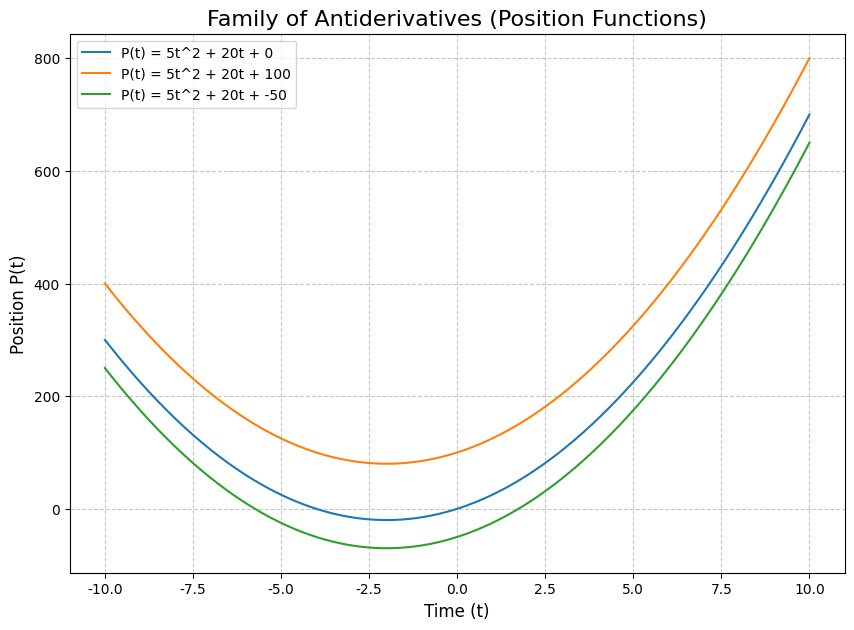

In [5]:
def plot_antiderivatives(C_values):
    """绘制多个不同积分常数的反导数函数图像"""
    fig, ax = plt.subplots(figsize=(10, 7))
    t = np.linspace(-10, 10, 400)
    
    for C in C_values:
        P = 5*t**2 + 20*t + C
        ax.plot(t, P, label=f'P(t) = 5t^2 + 20t + {C}')
        
    ax.set_title('Family of Antiderivatives (Position Functions)', fontsize=16)
    ax.set_xlabel('Time (t)', fontsize=12)
    ax.set_ylabel('Position P(t)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    plt.show()
    plt.close(fig)

# 绘制 P(t) = 5t^2 + 20t + C，其中 C 分别为 0, 100, -50
plot_antiderivatives([0, 100, -50])

### 探索步骤 2：抽象出定义
#### Exploration Step 2: Abstracting the Definition

**顿悟 (The "Aha!" Moment):**
从变化率反推原始函数，我们得到的不只是一个函数，而是一个**函数族 (family of functions)**，它们都由一个常数 `C` 相区别。这个求导的“逆运算”过程，就叫做**不定积分 (Indefinite Integral)**，其结果也被称为**反导数 (Antiderivative)**。
When we reverse-engineer the original function from its rate of change, we don't get a single function, but rather a **family of functions**, all differing by a constant `C`. This inverse operation of differentiation is called the **Indefinite Integral**, and its result is also known as the **Antiderivative**.

**数学定义 (Mathematical Definition):**
如果 `F'(x) = f(x)`，那么 `f(x)` 的不定积分就是 `F(x) + C`，其中 `C` 是一个未定的**积分常数 (Constant of Integration)**。
If `F'(x) = f(x)`, then the indefinite integral of `f(x)` is `F(x) + C`, where `C` is an arbitrary **Constant of Integration**.
$$\int f(x) dx = F(x) + C$$
对于我们的例子 (For our example)：
$$\int (10t + 20) dt = 5t^2 + 20t + C$$

### 探索步骤 3：引入高效工具 (符号计算)
#### Exploration Step 3: Introducing Efficient Tools (Symbolic Calculation)

`sympy` 的 `integrate` 函数在不指定积分范围时，计算的就是不定积分。它会帮我们找到反导数的核心部分，但我们必须在概念上理解，完整的答案要加上积分常数 `C`。
When the integration range is not specified, `sympy`'s `integrate` function calculates the indefinite integral. It finds the core part of the antiderivative for us, but we must conceptually understand that the complete answer includes the constant of integration, `C`.

In [ ]:
t = sp.Symbol('t')
velocity_func = 10*t + 20

# sp.integrate 不带积分范围参数时，计算不定积分
# When called without range arguments, sp.integrate computes the indefinite integral
position_func_family = sp.integrate(velocity_func, t)

print(f"速度函数 v(t) 是 (The velocity function v(t) is): {velocity_func}")
print(f"它的不定积分（路程函数族）是 (Its indefinite integral (the family of position functions) is): {position_func_family} + C")

### 强化练习：从日增长用户数反推总用户数
#### Reinforcement: Deducing Total Users from Daily Growth Rate

**场景 (Scenario):**
数据分析师告诉你，模型预测未来每天的新增用户数大约是 `r(t) = 200t + 500`。你想知道到第 `t` 天，App的总用户数 `U(t)` 会是多少？
An data analyst tells you that the predicted number of new users per day is approximately `r(t) = 200t + 500`. You want to know what the total number of users, `U(t)`, will be on day `t`.

**推理过程 (Reasoning):**
总用户数 `U(t)` 是日增长率 `r(t)` 的不定积分。仅有增长率是不够的，我们还需要一个“初始状态”来确定积分常数 `C`。假如我们知道App在第1天 (`t=1`) 时，已经有1000个初始用户，我们就可以唯一地确定 `C` 的值。
The total number of users `U(t)` is the indefinite integral of the daily growth rate `r(t)`. The growth rate alone is not enough; we also need an "initial condition" to determine the constant of integration `C`. Suppose we know that on day 1 (`t=1`), the app already had 1000 initial users. We can use this information to uniquely determine the value of `C`.

In [ ]:
t = sp.Symbol('t')
C = sp.Symbol('C')

# 增长率函数
growth_rate_func = 200*t + 500

# 1. 求不定积分，得到总用户数函数族
total_users_family = sp.integrate(growth_rate_func, t) + C
print(f"总用户数函数族 U(t) = {total_users_family}")

# 2. 建立方程：U(1) = 1000
initial_condition_eq = sp.Eq(total_users_family.subs(t, 1), 1000)
print(f"用初始条件建立方程 (Equation from initial condition): {initial_condition_eq}")

# 3. 求解积分常数 C
C_value = sp.solve(initial_condition_eq, C)
print(f"解得 C = (Solving for C gives) {C_value[0]}")

# 4. 得到最终确定的函数
total_users_func = total_users_family.subs(C, C_value[0])
print(f"最终的总用户数函数是 (The final total user function is): U(t) = {total_users_func}")

## 2.3 微积分基本定理 (The Fundamental Theorem of Calculus): 石破天惊的联系
### 2.3 The Fundamental Theorem of Calculus: The Bridge Between Two Worlds

到这里，你可能会觉得奇怪：
At this point, you might find it strange:

*   **定积分 (Definite Integral)**: 一个几何问题，通过“切片求和”来算面积。
    A geometric problem, calculating area by "slicing and summing."
*   **不定积分 (Indefinite Integral)**: 一个代数问题，寻找“反向的导数”。
    An algebraic problem, finding the "inverse" of a derivative.

这两件事看起来风马牛不相及。而微积分最伟大的发现——**微积分基本定理**——恰恰说明了这两件事是等价的！
These two concepts seem completely unrelated. However, the greatest discovery in calculus—the **Fundamental Theorem of Calculus**—reveals that they are, in fact, two sides of the same coin!

**定理的通俗解释 (The Theorem in Plain English):**

> 要求一条曲线 `f(x)` 从 `a` 到 `b` 下方的面积，你不需要真的去切片和求和。你只需要：
> To find the area under the curve of `f(x)` from `a` to `b`, you don't actually need to slice and sum. You just need to:
> 1.  找到 `f(x)` 的任意一个反导数（不定积分）`F(x)`。
>     Find any antiderivative (indefinite integral) of `f(x)`, let's call it `F(x)`.
> 2.  计算 `F(b) - F(a)`，这个差值就是你要的面积！
>     Calculate `F(b) - F(a)`. This difference is the exact area you're looking for!
>
> $$\int_{a}^{b} f(x) dx = F(b) - F(a)$$

**这个定理为什么伟大？(Why is this theorem so great?)**

因为它在“几何（面积）”和“代数（反导数）”之间架起了一座桥梁，提供了一个计算面积的超级捷径！把一个原本需要无穷运算的复杂问题，简化成了一个简单的代数减法。
Because it builds a bridge between geometry (area) and algebra (antiderivatives), providing a super shortcut for calculating areas! It transforms a complex problem that originally required an infinite number of operations into a simple algebraic subtraction.

**最后的比喻 (A Final Analogy):**

*   把速度函数 `v(t)` 想象成一条曲线。
    Imagine the velocity function `v(t)` as a curve.
*   **定积分** `∫ v(t) dt` 从 `a` 到 `b` 就是计算这条速度曲线下的面积，它代表了你在这段时间内走过的**总路程**。
    The **definite integral** `∫ v(t) dt` from `a` to `b` calculates the area under this velocity curve, which represents the **total distance** you've traveled during that time.
*   **不定积分** `∫ v(t) dt` 得到的是你的**路程函数** `P(t)` (求速度的反向就是路程)。
    The **indefinite integral** `∫ v(t) dt` gives you your **position function** `P(t)` (the inverse of velocity is position).
*   **基本定理说的是**：想计算从时间 `a` 到 `b` 你走了多远，你只需要用 `b` 时刻的里程表读数减去 `a` 时刻的里程表读数，即 `P(b) - P(a)`。这完全符合我们的常识！
    **The Fundamental Theorem says**: To calculate how far you've traveled from time `a` to `b`, you just need to take the odometer reading at time `b` and subtract the reading at time `a`, which is `P(b) - P(a)`. This perfectly matches our common sense!

## 2.4 如何求解不定积分：寻找反导数的“侦探游戏”
### 2.4 How to Solve Indefinite Integrals: A Detective Game for Antiderivatives

如果说微积分基本定理是告诉我们“**可以**那么做”，那么接下来的问题就是“**具体要怎么做？**”
If the Fundamental Theorem tells us **what** we can do, the next question is **how** to do it.

找到一个函数 `f(x)` 的反导数 `F(x)`（即求解不定积分 `∫f(x)dx`），不像求导那样有一套“万能”的固定流程。求导就像是“正向加密”，有固定的规则；而求反导数（积分）更像是**“逆向解密”，需要更多的技巧、经验和模式识别**。
Finding the antiderivative `F(x)` of a function `f(x)` (i.e., solving the indefinite integral `∫f(x)dx`) is not as straightforward as differentiation. Differentiation is like "forward encryption" with a fixed set of rules. Integration, on the other hand, is more like **"reverse decryption," requiring more skill, experience, and pattern recognition**.

#### 方法一：基本功——反向运用求导规则 (靠记忆和经验)
##### Method 1: The Basics - Applying Differentiation Rules in Reverse (Memory and Experience)

这是最基础也是最重要的一步。我们的脑子里需要有一个“求导-反导”的对应表。我们看到一个函数 `f(x)`，就要立刻像侦探一样思考：“谁的导数是它？”
This is the most fundamental and crucial step. We need a mental table of derivative-antiderivative pairs. When we see a function `f(x)`, we should immediately think like a detective: "Whose derivative is this?"

*   **反向幂函数法则 (The Power Rule in Reverse)**: `∫ x^n dx = (1/(n+1))x^(n+1) + C`
*   **反向三角函数/指数/对数法则 (Reverse Trig/Exponential/Log Rules)**:
    *   `∫cos(x) dx = sin(x) + C`
    *   `∫sin(x) dx = -cos(x) + C`
    *   `∫eˣ dx = eˣ + C`
    *   `∫(1/x) dx = ln|x| + C`
*   **线性法则 (Linearity)**: 积分可以逐项进行，也可以把常数系数提出来。
    Integration can be done term-by-term, and constant factors can be pulled out.

In [6]:
x = sp.Symbol('x')

# 例子: ∫(2x² + 5cos(x)) dx
f = 2*x**2 + 5*sp.cos(x)
F = sp.integrate(f, x)

print(f"The integral of f(x) = {f} is:")
print(f"F(x) = {F} + C")

The integral of f(x) = 2*x**2 + 5*cos(x) is:
F(x) = 2*x**3/3 + 5*sin(x) + C


#### 方法二：进阶技巧——换元法与分部积分法
##### Method 2: Advanced Techniques - U-Substitution and Integration by Parts

当问题更复杂时，我们需要更高级的技巧。
When the problem is more complex, we need advanced techniques.

*   **换元法 (U-Substitution)**: 链式法则的逆运算。当你看到一个函数和它的导数同时出现时，通常是使用换元法的信号。
    The reverse of the chain rule. It's a good candidate when you see a function and its derivative in the integrand.
*   **分部积分法 (Integration by Parts)**: 乘法法则的逆运算。适用于两个不同类型函数相乘的积分。
    The reverse of the product rule. Useful for integrating a product of two different types of functions.

In [ ]:
# 换元法例子: ∫2x * cos(x²) dx
f_sub = 2*x * sp.cos(x**2)
F_sub = sp.integrate(f_sub, x)
print(f"Integral of {f_sub} is: {F_sub} + C")

# 分部积分法例子: ∫x * cos(x) dx
f_parts = x * sp.cos(x)
F_parts = sp.integrate(f_parts, x)
print(f"Integral of {f_parts} is: {F_parts} + C")

## 2.5 当精确解不存在时：计算机的数值积分魔法
### 2.5 When an Exact Solution Doesn't Exist: The Magic of Numerical Integration

一个残酷的现实是：绝大多数函数，是无法用我们上面提到的任何方法找出“初等函数”形式的反导数的。例如 `∫e^(-x²) dx`。
A harsh reality: most functions do not have an antiderivative that can be expressed in terms of elementary functions. For example, `∫e^(-x²) dx`.

**那怎么办？(So, what do we do?)**
这时候，我们就回到了工程师的思路——**数值积分**。我们放弃寻找精确的“菜谱” `F(x)`，而是直接用计算机去算那个定积分的“总面积”。计算机可以把图形切成亿万个小矩形然后求和，速度飞快，精度极高。
This is where we return to an engineer's mindset: **numerical integration**. We give up on finding the exact formula `F(x)` and instead use a computer to directly calculate the "total area" of the definite integral. The computer can slice the area into billions of tiny rectangles and sum them up with incredible speed and precision.

#### 数值积分方法对比
##### Comparison of Numerical Integration Methods

计算机进行数值近似计算的本质，是采用不同的“积木”来逼近真实面积：
The essence of numerical approximation is to use different "building blocks" to approximate the true area:

| 方法 (Method) | 使用的“积木”形状 (Shape of Building Block) | 精度 (Accuracy) |
| :--- | :--- | :--- |
| **矩形法 (Rectangle Rule)** | 长方形 (Rectangle) | 低 (Low) |
| **梯形法 (Trapezoid Rule)** | 梯形 (Trapezoid) | 中 (Medium) |
| **辛普森法 (Simpson's Rule)** | 抛物线 (Parabola) | 非常高 (Very High) |

我们之前已经用 `scipy.integrate.quad` 进行了数值积分，它在后台使用的就是比这些更高级、更精确的自适应算法。
We have already used `scipy.integrate.quad` for numerical integration, which uses even more advanced and accurate adaptive algorithms behind the scenes.

#### 可视化实例：计算高斯函数的积分
##### Visualization Example: Integrating the Gaussian Function

让我们来计算无法手动积分的高斯函数 $$f(x) = e^{-x^2}$$ 在 `[-2, 2]` 区间的定积分。这个积分在统计学中极为重要。
Let's calculate the definite integral of the Gaussian function $$f(x) = e^{-x^2}$$ over the interval `[-2, 2]`, which cannot be integrated analytically. This integral is extremely important in statistics.

In [7]:
def gaussian(x):
    return np.exp(-x**2)

def plot_numerical_integration(func, a, b, N=10):
    x_fine = np.linspace(a - 0.5, b + 0.5, 400)
    y_fine = func(x_fine)
    
    x_steps = np.linspace(a, b, N + 1)
    y_steps = func(x_steps)
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    
    # 1. 矩形法 (Rectangle Rule)
    ax1 = axs[0]
    ax1.plot(x_fine, y_fine, 'b-')
    ax1.bar(x_steps[:-1], y_steps[:-1], width=np.diff(x_steps), align='edge', alpha=0.5, edgecolor='black')
    rect_area = np.sum(y_steps[:-1] * np.diff(x_steps))
    ax1.set_title(f'Rectangle Rule (N={N})\nArea ≈ {rect_area:.4f}')
    ax1.grid(True)

    # 2. 梯形法 (Trapezoid Rule)
    ax2 = axs[1]
    ax2.plot(x_fine, y_fine, 'b-')
    for i in range(N):
        polygon = Polygon([[x_steps[i], 0], [x_steps[i+1], 0], [x_steps[i+1], y_steps[i+1]], [x_steps[i], y_steps[i]]], 
                          edgecolor='black', facecolor='gray', alpha=0.5)
        ax2.add_patch(polygon)
    trapz_area = integrate.trapezoid(y_steps, x_steps)
    ax2.set_title(f'Trapezoid Rule (N={N})\nArea ≈ {trapz_area:.4f}')
    ax2.grid(True)

    # 3. 辛普森法 (Simpson's Rule) - Scipy内部实现
    ax3 = axs[2]
    ax3.plot(x_fine, y_fine, 'b-')
    ax3.fill_between(x_steps, y_steps, color='gray', alpha=0.5)
    simps_area = integrate.simpson(y_steps, x_steps)
    ax3.set_title(f'Simpsons Rule (N={N})\nArea ≈ {simps_area:.4f}')
    ax3.grid(True)
    
    # 精确值 (由scipy.quad计算)
    exact_area, _ = integrate.quad(func, a, b)
    fig.suptitle(f'Numerical Integration of Gaussian Function (Exact Area ≈ {exact_area:.4f})', fontsize=16)
    
    plt.show()
    plt.close(fig)

interact(lambda N: plot_numerical_integration(gaussian, -2, 2, N), N=IntSlider(min=4, max=50, step=2, value=10));

interactive(children=(IntSlider(value=10, description='N', max=50, min=4, step=2), Output()), _dom_classes=('w…